# Final Project - Part A - Analyze Data

## Loading data

In [15]:
import cPickle as Pickle

def load_song(path):
    with open(path, 'rb') as input_file:
        songs = Pickle.load(input_file)
    return songs

the_beatles_songs = load_song('The Beatles' + ".pkl")
britney_spears_songs = load_song('Britney Spears' + ".pkl")
eminem_songs = load_song('Eminem' + ".pkl")

We load the data from three pickle file each loading variable contain list of pairs
Each item in the list represent a song, when the firs item in the pair is the song headline and the second is the song lyrics.
lets see one song for example

In [16]:
the_beatles_songs[0]

['I Saw Her Standing There',
 u"One, two, three, four!\n\nWell, she was just seventeen\nIf you know what I mean\nAnd the way she looked\nWas way beyond compare\nSo how could I dance with another\nWhen I saw her standing there?\n\nWell, she looked at me\nAnd I, I could see\nThat before too long\nI'd fall in love with her\nShe wouldn't dance with another\nWhen I saw her standing there\n\nWell, my heart went boom\nWhen I crossed that room\nAnd I held her hand in mine\n\nWhoa, we danced through the night\nAnd we held each other tight\nAnd before too long\nI fell in love with her\nNow, I'll never dance with another\nWhen I saw her standing there\n\nWell, my heart went boom\nWhen I crossed that room\nAnd I held her hand in mine\n\nOh, we danced through the night\nAnd we held each other tight\nAnd before too long\nI fell in love with her\nNow, I'll never dance with another\nSince I saw her standing there\nWhoa, since I saw her standing there\nYeah, well, since I saw her standing there"]

In [17]:
num_of_songs=[len(the_beatles_songs),len(britney_spears_songs),len(eminem_songs)]
num_of_songs

[347, 208, 231]

## Data preparation

### Organize the data

In [18]:
#adding singer name to each song on the lsit
for song_list, singer in zip(
            [the_beatles_songs, britney_spears_songs, eminem_songs, ],
            ["The Beatles", "Britney Spearss", "Eminem"]):
        (map(lambda song: song.append(singer), song_list))

now each song is a triple headline,lyrics,singer

In [19]:
the_beatles_songs[0:1]

[['I Saw Her Standing There',
  u"One, two, three, four!\n\nWell, she was just seventeen\nIf you know what I mean\nAnd the way she looked\nWas way beyond compare\nSo how could I dance with another\nWhen I saw her standing there?\n\nWell, she looked at me\nAnd I, I could see\nThat before too long\nI'd fall in love with her\nShe wouldn't dance with another\nWhen I saw her standing there\n\nWell, my heart went boom\nWhen I crossed that room\nAnd I held her hand in mine\n\nWhoa, we danced through the night\nAnd we held each other tight\nAnd before too long\nI fell in love with her\nNow, I'll never dance with another\nWhen I saw her standing there\n\nWell, my heart went boom\nWhen I crossed that room\nAnd I held her hand in mine\n\nOh, we danced through the night\nAnd we held each other tight\nAnd before too long\nI fell in love with her\nNow, I'll never dance with another\nSince I saw her standing there\nWhoa, since I saw her standing there\nYeah, well, since I saw her standing there",
  '

In [20]:
# adding all songs to one list
songs_list=the_beatles_songs+britney_spears_songs+eminem_songs

#remove dupliaction
print ("songs befor remove dupliaction" + str(len(songs_list)) )

seen=set()
temp=[]
for song in songs_list:
    if not song[0] in seen:
        seen.add(song[0])
        temp.append(song)
songs_list=temp

print ("songs after remove dupliaction" + str(len(songs_list)) )

songs befor remove dupliaction786
songs after remove dupliaction580


we can see the 206 song where duplicate

### Cleaning the data

In [21]:
import unicodedata
import re

#saving original songs structure for later analysis
songs_original_lyrics=[x[1] for x in songs_list]

#change song lyrics to string of words withot structure
regex = re.compile('[^a-zA-Z1-9\'\s]')
def clean_lyrics(song):
    song[1]=unicodedata.normalize('NFKD', song[1]).encode('ascii', 'ignore')
    song[1]=re.sub('[^a-zA-Z1-9\']'," ",song[1])
    song[1]=song[1].lower()

map(clean_lyrics ,songs_list)
songs_list[0:1]

[['I Saw Her Standing There',
  "one  two  three  four   well  she was just seventeen if you know what i mean and the way she looked was way beyond compare so how could i dance with another when i saw her standing there   well  she looked at me and i  i could see that before too long i'd fall in love with her she wouldn't dance with another when i saw her standing there  well  my heart went boom when i crossed that room and i held her hand in mine  whoa  we danced through the night and we held each other tight and before too long i fell in love with her now  i'll never dance with another when i saw her standing there  well  my heart went boom when i crossed that room and i held her hand in mine  oh  we danced through the night and we held each other tight and before too long i fell in love with her now  i'll never dance with another since i saw her standing there whoa  since i saw her standing there yeah  well  since i saw her standing there",
  'The Beatles']]

### Feature engineering

In [22]:
import nltk

# count number of words in each song
num_of_words=[len (nltk.word_tokenize(song[1])) for song in songs_list]

In [23]:
import collections
#count the next features verse_number chorus_number lines_in_chorus avg_line_in_verse

songs_original_lyrics=map (lambda song : unicodedata.normalize('NFKD', song).encode('ascii', 'ignore'),songs_original_lyrics )
data=[]
for song in songs_original_lyrics:
    verse_list = song.split("\n\n")
    chorus = [item for item, count in collections.Counter(verse_list).items() if count > 1]
    verse = [item for item, count in collections.Counter(verse_list).items() if count == 1]
    verse_num=len(verse)
    chorus_num = [count for item, count in collections.Counter(verse_list).items() if count > 1][0] if len(chorus)>0 else 0   
    lines_in_chorus=len (chorus[0].split("\n")) if len(chorus)>0 else 0
    if len(verse)>0:
        avg_line_in_verse= float(reduce((lambda x, y: x + y),
                              map(lambda x: len(x.split("\n")),verse)))/len (verse)
    else:
        avg_line_in_verse=0
    data.append([verse_num,chorus_num,lines_in_chorus,avg_line_in_verse])


In [24]:
#create data frame with all features per song
for song,word,features in zip(songs_list,num_of_words,data):
    song.append(word)
    song.extend (features)
    

import pandas as pd
df = pd.DataFrame(songs_list,columns=['headline','lyrics','singer','word_count','verse_count','chorus_count','lines_in_chorus_count','avg_line_in_verse_count'])    
#show examle of th data
df.head(3)


,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
0,I Saw Her Standing There,one two three four well she was just sev...,The Beatles,189,5,2,3,5.400000
1,Misery,the world is treating me bad misery i'm the k...,The Beatles,129,7,0,0,3.857143
2,Anna (Go To Him),anna you come and ask me girl to set you free...,The Beatles,205,6,0,0,6.666667


### Data understanding 

let's see summary of the data

In [25]:
df.dropna().describe()

,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
count,580.000000,580.000000,580.000000,580.000000,580.000000
mean,443.372414,8.246552,1.584483,2.818966,6.518048
std,319.514240,6.990957,1.552123,2.955628,5.520195
min,19.000000,0.000000,0.000000,0.000000,0.000000
25%,197.000000,4.000000,0.000000,0.000000,3.887255
50%,316.500000,6.000000,2.000000,3.000000,4.750000
75%,712.000000,10.000000,2.000000,4.000000,6.800000
max,1542.000000,85.000000,8.000000,18.000000,61.000000


We feel that the max value for each attribute is a little higher the expected so we will check the data just to be sure

In [26]:
df.sort_values('word_count',ascending=False).head(3)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
566,Bad Guy,it's like i'm in this dirt digging up old hurt...,Eminem,1542,21,2,7,6.619048
428,Stan,my tea's gone cold i'm wondering why i got out...,Eminem,1446,22,5,6,4.136364
452,We Shine,bust it rugged shine like a gold nugget wha...,Eminem,1252,5,2,8,18.400000


In [27]:
df.sort_values('verse_count',ascending=False).head(3)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
193,The Beatles Third Christmas Record,all singing all my troubles seemed so far...,The Beatles,1195,85,3,1,1.623529
195,Christmas Time (Is Here Again),j it's a clumsy remix take 444 all s...,The Beatles,618,52,0,0,1.884615
467,The Kiss,eminem i'm gonna kill this bitch i'm gonna ...,Eminem,332,45,0,0,2.177778


In [28]:
df.sort_values('chorus_count',ascending=False).head(3)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
434,I'm Back,that's why they call me slim shady i'm back ...,Eminem,1059,15,8,4,4.933333
577,Beautiful Pain,i can feel the heat rising everything is on fi...,Eminem,783,7,7,4,7.285714
265,I Love Rock 'N' Roll,hey is this thing on i saw him dancing ther...,Britney Spearss,409,5,7,4,5.000000


In [29]:
df.sort_values('lines_in_chorus_count',ascending=False).head(3)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
69,You Won't See Me,when i call you up your line's engaged i have ...,The Beatles,412,3,2,18,11.000000
288,Don't Hang Up,baby i'm lying all alone a pillow is all i hav...,Britney Spearss,375,5,2,16,9.400000
479,Monkey See Monkey Do,ha ha ha ha ha ha ha ay yo 5 whut i tell you ...,Eminem,713,3,2,15,23.666667


In [30]:
df.sort_values('avg_line_in_verse_count',ascending=False).head(3)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
518,Freestyle (Dissin' The Source),i got a riddle what's little and talks big w...,Eminem,517,1,0,0,61.0
306,Everytime (Valentin Remix),come notice me and take my hand so why are we ...,Britney Spearss,214,1,0,0,41.0
525,Dr. West (Skit),morning marshall morning doc so we're...,Eminem,324,1,0,0,40.0


Most of high valuse are for eminem wich make sense so most of them ok. but for the verse count max values we can see that The Beatles have a few records so we will remove those.

In [31]:
df.loc[df['singer']=='The Beatles'].sort_values('verse_count',ascending=False).head(15)

,headline,lyrics,singer,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
193,The Beatles Third Christmas Record,all singing all my troubles seemed so far...,The Beatles,1195,85,3,1,1.623529
195,Christmas Time (Is Here Again),j it's a clumsy remix take 444 all s...,The Beatles,618,52,0,0,1.884615
197,The Beatles Seventh Christmas Record,mama j now you lads will you just shout ...,The Beatles,854,43,0,0,2.860465
194,Pantomime / Everywhere It's Christmas,all singing ev'rywhere it's christmas ev'...,The Beatles,773,35,0,0,2.371429
192,Another Beatles Christmas Record,all singing jingle bells p hello ...,The Beatles,710,29,0,0,1.413793
196,The Beatles 1968 Christmas Record,r hello this is a big hi and a sincere m...,The Beatles,900,25,0,0,4.480000
191,The Beatles Christmas Record,hoo all good king wenceslas looked out on ...,The Beatles,954,17,0,0,2.823529
187,Hey Jude,hey jude don't make it bad take a sad song an...,The Beatles,405,16,3,4,3.500000
149,It's All Too Much,spoken to your mother it's all too much it...,The Beatles,411,14,2,4,4.642857
177,Let It Be,when i find myself in times of trouble mother ...,The Beatles,272,13,0,0,4.000000


we can see that above 16 verse are records so we will remove does

In [32]:
#remove all The Beatles recoreds
df1=df[df.singer=='The Beatles']
df1[df1.verse_count>16].index
df =df.drop(df1[df1.verse_count>16].index)
#show the new data summary
df.dropna().describe()

,word_count,verse_count,chorus_count,lines_in_chorus_count,avg_line_in_verse_count
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,438.310646,7.848168,1.598604,2.851658,6.567209
std,317.557342,5.561134,1.551944,2.958451,5.534755
min,19.000000,0.000000,0.000000,0.000000,0.000000
25%,197.000000,4.000000,0.000000,0.000000,3.933333
50%,309.000000,6.000000,2.000000,3.000000,4.800000
75%,709.000000,9.000000,2.000000,4.000000,6.800000
max,1542.000000,45.000000,8.000000,18.000000,61.000000


comparing the different singers mean nomber of words

In [33]:
df1=df[df.singer=='The Beatles']
df2=df[df.singer=='Britney Spearss']
df3=df[df.singer=='Eminem']
print ("The Beatles word count mean ="+ str(df1['word_count'].mean()))
print ("Britney Spearss word count mean ="+ str(df2['word_count'].mean()))
print ("Eminem word count mean ="+ str(df3['word_count'].mean()))

The Beatles word count mean =197.464285714
Britney Spearss word count mean =374.717948718
Eminem word count mean =769.243523316


we can see thet eminem have a lot more words per song

lets compare the different singers on the other features

In [34]:
#create data frame for each singer
the_beatles=[df1['verse_count'].mean(),df1['chorus_count'].mean(),df1['lines_in_chorus_count'].mean(),df1['avg_line_in_verse_count'].mean()]
britney_spearss=[df2['verse_count'].mean(),df2['chorus_count'].mean(),df2['lines_in_chorus_count'].mean(),df2['avg_line_in_verse_count'].mean()]
eminem=[df3['verse_count'].mean(),df3['chorus_count'].mean(),df3['lines_in_chorus_count'].mean(),df3['avg_line_in_verse_count'].mean()]


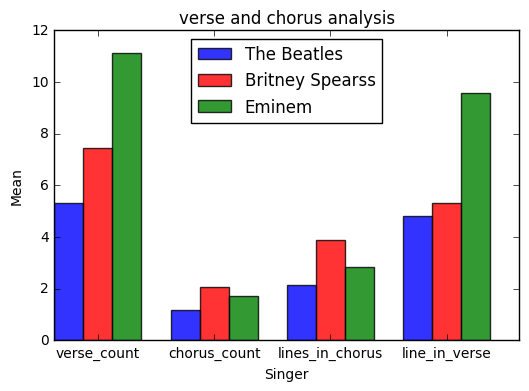

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#plot the other feature comparison
n_groups = 4
fig, ax1  = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

rects1 = plt.bar(index, the_beatles, bar_width,
                 alpha=0.8,
                 color='b',
                 label='The Beatles')
 
rects2 = plt.bar(index + bar_width, britney_spearss, bar_width,
                 alpha=0.8,
                 color='r',
                 label='Britney Spearss')

rects3 = plt.bar(index + bar_width*2, eminem, bar_width,
                 alpha=0.8,
                 color='g',
                 label='Eminem')
plt.xlabel('Singer')
plt.ylabel('Mean')
plt.title('verse and chorus analysis')
plt.xticks(index + bar_width*1.5, ('verse_count','chorus_count','lines_in_chorus','line_in_verse'))
plt.legend(loc='upper center')


We can see that the Eminem has a higher number of verse and another line per verse which makes sense given the word count and the fact that it is rapper.

lets check number of songs we have in our data per singer

In [37]:
print ("The Beatles have "+ str(len(df1))+" songs")
print ("Britney Spearss have "+ str(len(df2))+" songs")
print ("Eminem have "+ str(len(df3))+" songs")

The Beatles have 224 songs
Britney Spearss have 156 songs
Eminem have 193 songs


In [38]:
# save the data
filename = 'songs.csv'
df.to_csv(filename, encoding='utf-8')